**Daniel Flores Rodríguez - A01734184**

Módulo 5 Evaluación de un modelo y su aplicación para predicción

In [ ]:
# Se instala los paquetes y librerias necesarias para poder realizar el analizis de la situacion problema, utilizamos matplotlib para poder graficar
# y visualisar nuestros dacumentos 
!pip install matplotlib
# se usa pandas para el manejo y vizualizacion de datos de matrices
!pip install pandas
#usada para poder leer los dataframes
!pip install pandas_datareader

#importamos librerias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np




#importamos nuestro archivo csv
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/ITESM/Septimo Semestre/DeepLearning/Bloque2"
%ls

In [89]:
# importamos archivo csv de nombres de las firmas que contienen las firmas, con informacion relevante de cada una de estas.
data = pd.read_csv('Indicadores20221007105052.csv')
data # se imprime el dataset, para ver si es el correcto

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
0,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.274552,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
350,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.612900,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.865984,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.943249,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.022521,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [90]:
#creamos un nuevo dataset de los indicadores que nos interesan，en este caso el periodo y el valor a traves de la funcion assign.
df_indicadores = pd.DataFrame().assign(Periodo=data['Periodo'], Valor=data['Valor'])
df_indicadores



,Periodo,Valor
0,2022/07,111.274552
1,2022/06,112.797501
2,2022/05,114.442424
3,2022/04,109.529866
4,2022/03,111.940152
...,...,...
350,1993/05,63.612900
351,1993/04,61.865984
352,1993/03,63.943249
353,1993/02,61.022521


Procedemos a realizar transformaciones de variable de valor para poder realizar un mejor manejo de la información y asegurarnos que los valores sean numeros con los que podamos trabajar, asi mismo se realiza un cambio de la variable de Periodo, para poder manejar fechas en formato YYYY-MM--DD y así poder trabajar con plots y graficas de manera mas intuitiva y fácil.

In [92]:
#Nos aseguramos de que los valores de la variable 'Valor' sean numeros enteros flotantes.
df_indicadores['Valor'] = df_indicadores['Valor'].astype(float)

In [93]:
#de igual manera, cambiamos el formato de la variable periodo.
holder = df_indicadores['Periodo']
df_indicadores['Periodo'] = pd.to_datetime(holder, infer_datetime_format=True)

In [94]:
#imprimimos los valores del dataframe para comprobar el cambio relaizado

df_indicadores

,Periodo,Valor
0,2022-07-01,111.274552
1,2022-06-01,112.797501
2,2022-05-01,114.442424
3,2022-04-01,109.529866
4,2022-03-01,111.940152
...,...,...
350,1993-05-01,63.612900
351,1993-04-01,61.865984
352,1993-03-01,63.943249
353,1993-02-01,61.022521


Tras haber realizado una pequeña limpieza de datos y extracción de aquellos datos quenos interesan para este analisis, procedo a realziar las pruebas que se solicitan, y así poder decidir la tranformacion de la variable.

# **1- Realizar pruebas estadísticas de estacionariedad y decide el tipo de transformación de la variable**

In [95]:
#asignamos como index del dataframe las fechas de la variable periodo
df_indicadores.set_index(['Periodo'], inplace=True)

In [96]:
#imprimimos el valor del nuevo dataset.

df_indicadores

,Valor
Periodo,
2022-07-01,111.274552
2022-06-01,112.797501
2022-05-01,114.442424
2022-04-01,109.529866
2022-03-01,111.940152
...,...
1993-05-01,63.612900
1993-04-01,61.865984
1993-03-01,63.943249


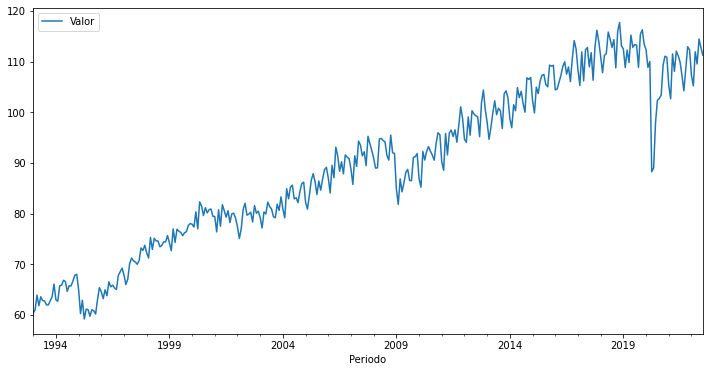

In [97]:
#realizamos una nueva visualizacion de los cambios.

plt_indicadores = df_indicadores.plot(y='Valor',figsize=(12,6), use_index=True)

**Prueba: Argumented Dickey-Fuller test**

In [98]:
from statsmodels.tsa.stattools import adfuller
#perform augmented Dickey-Fuller test
adfuller(df_indicadores['Valor'])

(0.12319348265076839,
 0.9676094071068195,
 17,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 1506.6592538949058)

In [99]:
0.9676094071068195 < 0.05

False

Analisis del resultado de prueba dickey-fuller:

El resultado arrojado se traduce a que el primer resultado es de la lista es adf, el segundo valor es el p-value, siendo este mismo el que nos interesa, ya que como sabemos el p-value nos dice que es el nivel más bajo (de insignificancia) en el que el valor observado de la estadística de prueba es significativo. El valor P es el nivel de significancia más pequeño que conduce al rechazo de la hipótesis nula. En este caso particular podemos observar que es menor que 0.05, lo que nos indica que la variable a emplear, es decir, el valor se considera que es no estacionaria, esto lo podemos comprobar en la grafica implementada anteriormente y en este resultado de Dickey-Fuller implementado.

Es por el resultado obtenido en el test, que se procederá a realizar una transofmración de la variable Value a su valor logaritmico:

In [100]:
#aqui, solo estamos obteniendo el valor logaritmico de cada valor de la variable 'Valor'.
df_indicadores_lg = pd.Series(np.log(df_indicadores['Valor'])).dropna()

#mostramos el nuevo dataset sin valores NaN y habiendo aplicado log
df_indicadores_lg

Periodo
2022-07-01    4.712001
2022-06-01    4.725594
2022-05-01    4.740072
2022-04-01    4.696197
2022-03-01    4.717964
                ...   
1993-05-01    4.152816
1993-04-01    4.124970
1993-03-01    4.157996
1993-02-01    4.111243
1993-01-01    4.101116
Name: Valor, Length: 355, dtype: float64

Posteriormente se procede a realizar la primera diferencial de normal de la variable en cuestión, la cual podremos probar nuevamente con el test de Dickey-Fuller que ahora ya es estasionaria.

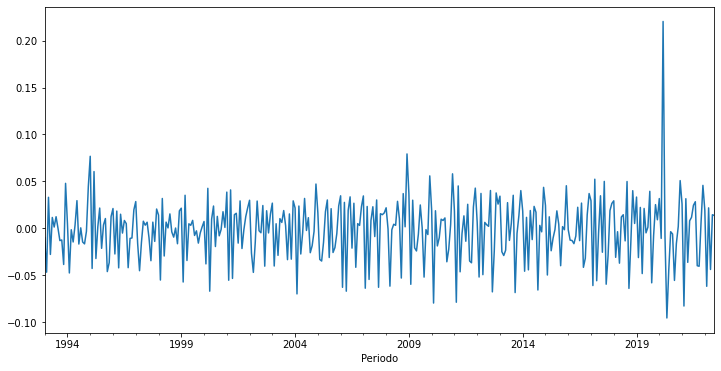

In [101]:
#aplicamos la primera diferencial de normal de la variable 
df_indicadores_transformed = df_indicadores_lg.diff().dropna()

#ploteamos el nuevo df con la primera diferencial de normal aplicada en la variable.
df_indicadores_transformed.plot(figsize=(12,6))

In [102]:
#realizamos el test de Deckey-Fuller para saber si la variable/serie es estacionaria

adfuller(df_indicadores_transformed)

(-5.154448587019208,
 1.0883580348707864e-05,
 17,
 336,
 {'1%': -3.449962981927952,
  '5%': -2.870180642420163,
  '10%': -2.5713734527352607},
 -1528.1823248905755)

In [103]:
1.0883580348707864e-05 < 0.05

True

Podemos observar que el valor de esta variable transformada es estacionaria, pues su p-value obtenido del test de Dickey-Fuller es 1.0883580348707864e-05, lo que significa que es menor a 0.05

# **2-Calibra un modelo ARIMA-SARIMA basado en pruebas y gráficos de autocorrelaciones . Explica claramente el proceso de calibración y la razón de cómo va modificando los parámetros.**

Debido a que se esta usando una variable que es reportada cada mes de los años incluidos en el dataframe, se procederá a calcular la primera diferencial pero con periodo de 12, esto debido a que se esta trabajando con datos mensuales, como se mencionaba anteriormente, adicionalmente cabe recalcar que esto se realiza para que las predicciones futuras de esta serie/modelo sean mejors.

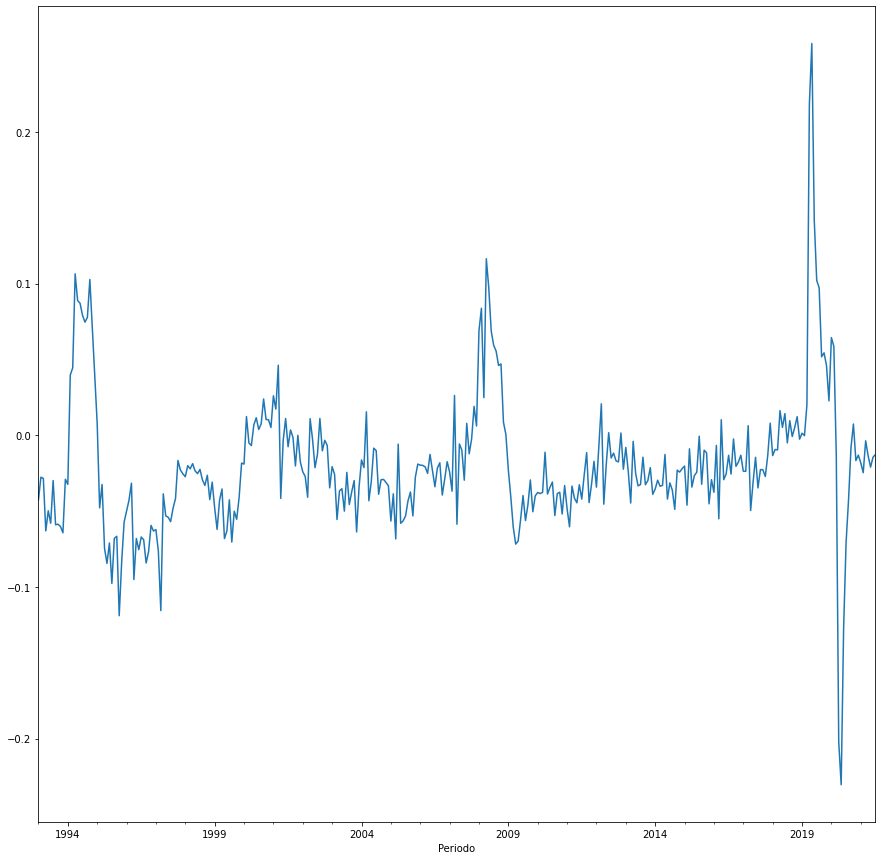

In [104]:
df_indicadores_transformed_seanl = df_indicadores_lg.diff(12).dropna()

df_indicadores_transformed_seanl.plot(figsize=(15,15))

In [105]:
#visualizamos los nuevos indicadores que acabamos de obtener de la transformacion anterior.
df_indicadores_transformed_seanl

Periodo
2021-07-01   -0.012631
2021-06-01   -0.014522
2021-05-01   -0.021001
2021-04-01   -0.013414
2021-03-01   -0.003661
                ...   
1993-05-01   -0.049767
1993-04-01   -0.063042
1993-03-01   -0.028476
1993-02-01   -0.027647
1993-01-01   -0.042483
Name: Valor, Length: 343, dtype: float64

In [106]:
adfuller(df_indicadores_transformed_seanl) #Se realiza un test de dickey-fuller de los nuevos datos

(-3.6773873470313796,
 0.004442700985986872,
 17,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 -1542.6248502808344)

In [107]:
0.004442700985986872 < 0.05

True

De nuevo podemos observar que el valor de p-value es menor a 0.05, lo que nos sigue diciendo que la variable de valor es estacionaria.

In [108]:
#se procede a convertir en frame estos datos trasnformados, con el fin de realizar mas adelante predicciones del modelo.

handler = df_indicadores_transformed_seanl

df_transfomed_model = handler.to_frame(name="Valor")

df_transfomed_model

,Valor
Periodo,
2021-07-01,-0.012631
2021-06-01,-0.014522
2021-05-01,-0.021001
2021-04-01,-0.013414
2021-03-01,-0.003661
...,...
1993-05-01,-0.049767
1993-04-01,-0.063042
1993-03-01,-0.028476


Debido a que necesitaremos que lso valores de la variable esten acomodados de forma ascendente, tendremos que cambiar dicho orden

In [109]:
df_transfomed_model = df_transfomed_model.sort_index(axis=0,ascending=True)
df_transfomed_model

,Valor
Periodo,
1993-01-01,-0.042483
1993-02-01,-0.027647
1993-03-01,-0.028476
1993-04-01,-0.063042
1993-05-01,-0.049767
...,...
2021-03-01,-0.003661
2021-04-01,-0.013414
2021-05-01,-0.021001


**Función de autocorrelación (ACF)**

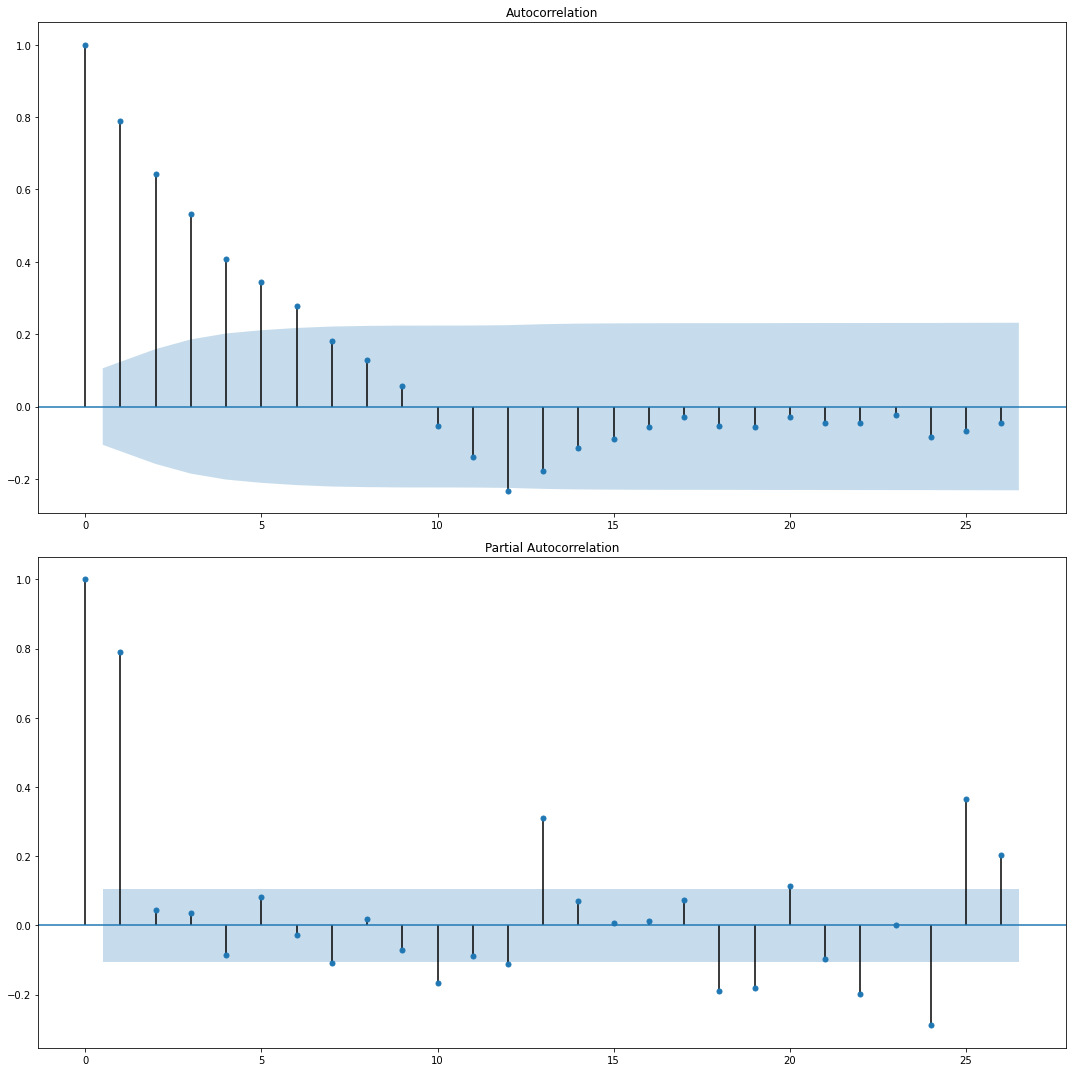

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.graphics.tsaplots import plot_acf

#obtenemos subplots para tener la base de las graficas
f,ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

#invocamos los metodos para realizar las graficas correspondientes
plot_acf(df_transfomed_model['Valor'], ax=ax[0])
plot_pacf(df_transfomed_model['Valor'], ax=ax[1], method='ols')

plt.tight_layout()
plt.show() #se muestran


De la misma manera, como se mencionaba anteriormente; no podemos esperar solamente confiar en nuestra intuición visual a traves de los graficos anteriores, por lo tanto se procede a realizar las matrices con valores equivalentes a las gráficas anteriores.

In [111]:
from statsmodels.graphics.tsaplots import acf
print(acf(df_transfomed_model['Valor']))

[ 1.          0.79047642  0.64147879  0.53244045  0.40779488  0.34500971
  0.27898463  0.18243636  0.1276219   0.05698009 -0.0537973  -0.14036262
 -0.23316974 -0.17860551 -0.114916   -0.09039653 -0.05635981 -0.02775208
 -0.05310755 -0.05756198 -0.02919748 -0.04619563 -0.04647523 -0.02265412
 -0.08392988 -0.06738621 -0.04545575 -0.07591446 -0.08507093 -0.07820957
 -0.08622162 -0.07525397 -0.07215336 -0.08488155 -0.07769853 -0.08569248
 -0.05060586 -0.05640098 -0.06304812 -0.05420552 -0.02659956]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [112]:
from statsmodels.graphics.tsaplots import pacf
print(pacf(df_transfomed_model['Valor']))

[ 1.          0.79278776  0.04503167  0.03488779 -0.08880298  0.0838832
 -0.03042485 -0.11107594  0.01422282 -0.07406228 -0.17394429 -0.09397316
 -0.1161817   0.321777    0.08015669 -0.00725111  0.00227709  0.06062888
 -0.1368061  -0.07932498  0.10625855 -0.10433406 -0.15018076  0.03358554
 -0.2190257   0.30046715  0.0841849  -0.07116885 -0.04451381  0.08021931
 -0.11516281 -0.07999055  0.11303027 -0.10163717 -0.17118313  0.05923459
 -0.00240067  0.04646125  0.15336663 -0.06046854  0.01374353]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


**Analizis de resultados:**

Para empezar, debemos recordar que el ACF nos muestra las correlaciones AC entre la serie con la que trabajamos y sus errores, mientras que el PACF nos indica las autocorrelaciones parciales de la serie con la que trabajamos y, de igual manera, sus errores.

Analizemos la primera grafica de autocorrelación. En esta podemos observar como las primeras 7 lineas verticales, sobresalen de manera notable de la zona azul y la linea horizontal azul, la cual como sabemos, es el intervalo de 95% de confianza para las autocorrelaciones, por lo tanto, si la linea vertical cruza la linea punteada azul, esto querrá decir que la autocorrelación especifica es significativamente diferente de cero. En una interpretación un poco más significativa de la primera grafica de ACF, podemos decir entonces que las primeras 6 o 7 lineas verticales son positivas y significativas, con un comportamiento descendente.

Para el caso de la segunda grafica tambien conocida como PACF, podemos ver autocorrelaciones especificas, que llegan a medir el cuanto más esta corrlacionada la serie con la que estamos trabajando y sus repectivos LAG, despues de haber considerado el efecto de las autocorrelaciones de los LAG de orden inferior.

En la grafica obtenida de PACF, podemos ver como las primeras dos lineas verticales son positivas y singulares, posteriormente podemos ver como las demas autocorrelaciones muestran un valor bajo cero.

Podemos demostrar lo dicho anteriormente, con ayuda de las matrices que realizamos posteriormente de plotear las graficas de ACF y PACF.

#**3-Interpreta los coeficientes y su significancia estadística del modelo calibrado**

Poteriormente, tras haber analizado las graficas de autocorrelación, podremos, por así decirlo, calibrar nuestros modelos de prediccion, los cuales serán ARIMA y SARIMA...

ARIMA:

para este modelo, podemos concluir que las variales quedan de esta forma: 

p-> se refiere a la los terminos autorregresivos, el valor asignado es de 1 a 2, esto para aumentar la presicion del modelo 

d-> se refiere a cuantas diferencias se necesitaron para hacer la serie de tiempo estacionaria. la dejaremos con un valor de 0.

q-> se refiere al numero de MA (moving average) en el modelo. lo dejaremos con un valor de 1.


SARIMA:

P-> se refiere al numero de terminos autorregresivos estacionarios , dejaremos este valor en 1.

D->se refiere a cuantas diferencias estacionales se necesitaron para poder hacer la serie de tiempo estacionaria, en mi caso dejare este parametro con valor 0.

Q-> se refiere a terminos promedio del movimiento estacional, pude ser el valor 0 o 1, en este caso para el modelo dejare el valor de 2, mas adelante explicaré el motivo.

periods-> se refiere a el numero de periodos (meses) en un año.

**Estimación de modelos ARIMA-SARIMA**

In [113]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df_transfomed_model, order = (2,0,1))

result = arima_model.fit()

print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                  343
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 743.116
Date:                Wed, 26 Oct 2022   AIC                          -1476.231
Time:                        20:18:26   BIC                          -1457.043
Sample:                    01-01-1993   HQIC                         -1468.588
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.006     -3.700      0.000      -0.031      -0.010
ar.L1          1.7859      0.043     41.060      0.000       1.701       1.871
ar.L2         -0.7918      0.035    -22.547      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [114]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(result.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,56.141508,1.128789e-07


Al realizar la prueba de ruido blanco, pordemo ver que el resultado obtenido es menor a 0.05, lo que es un indicador que el modelo podria tener problemas al predecir de manera correcta. A continuación realizaremos un modelo SARIMA, con los ajustes que se mencionaron anteriormente en la explicacion de las variables...

In [115]:
sarima_model = sm.tsa.statespace.SARIMAX(
                            df_transfomed_model, 
                            order=(2,0,1), 
                            seasonal_order=(1,0,1,12), 
                            enforce_stationarity=False, 
                            enforce_invertibility=False)

sarima_model = sarima_model.fit()

print(sarima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Valor   No. Observations:                  343
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 772.517
Date:                            Wed, 26 Oct 2022   AIC                          -1533.035
Time:                                    20:18:29   BIC                          -1510.258
Sample:                                01-01-1993   HQIC                         -1523.948
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5238      0.088     17.402      0.000       1.352       1.695
ar.L2         -0.5270      0.087   

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [116]:
sm.stats.acorr_ljungbox(sarima_model.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,19.107697,0.085962


Podemos observar que al realizar una prueba de ruido, obtenemos un valor que ahora sí es mayor a 0.05, lo cual nos da un indicio de que el modelo se ajusta de manera correcta.

A continuación, obtendremos graficas que nos ayudaran a corroborar el resultado obtenido del modelo...

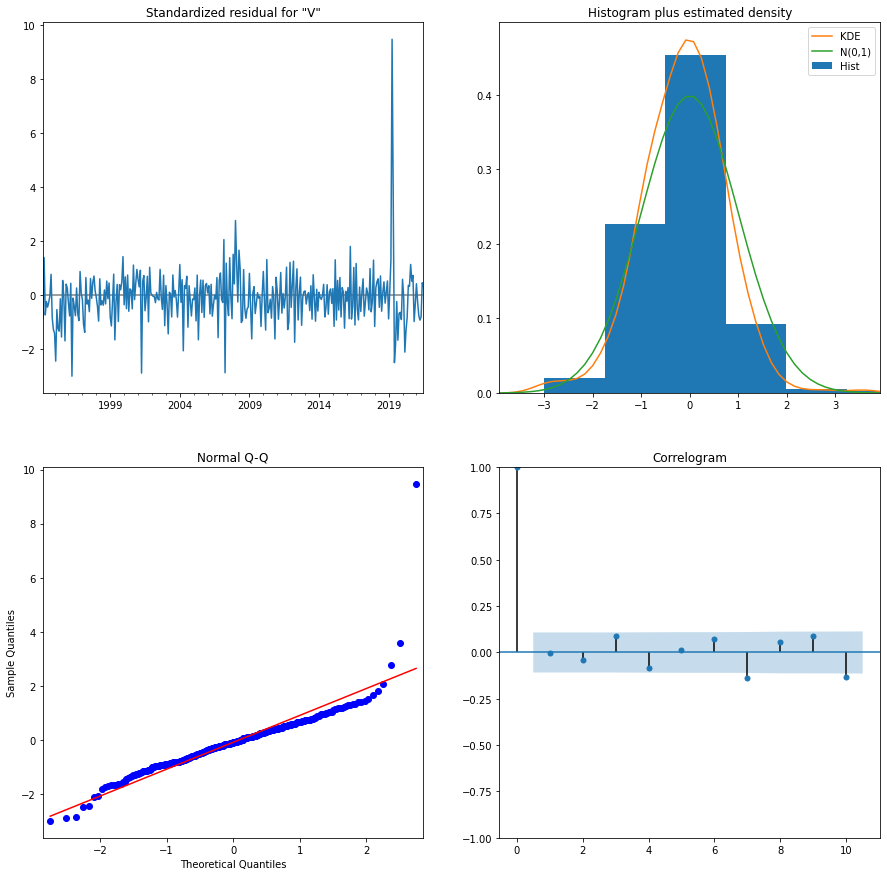

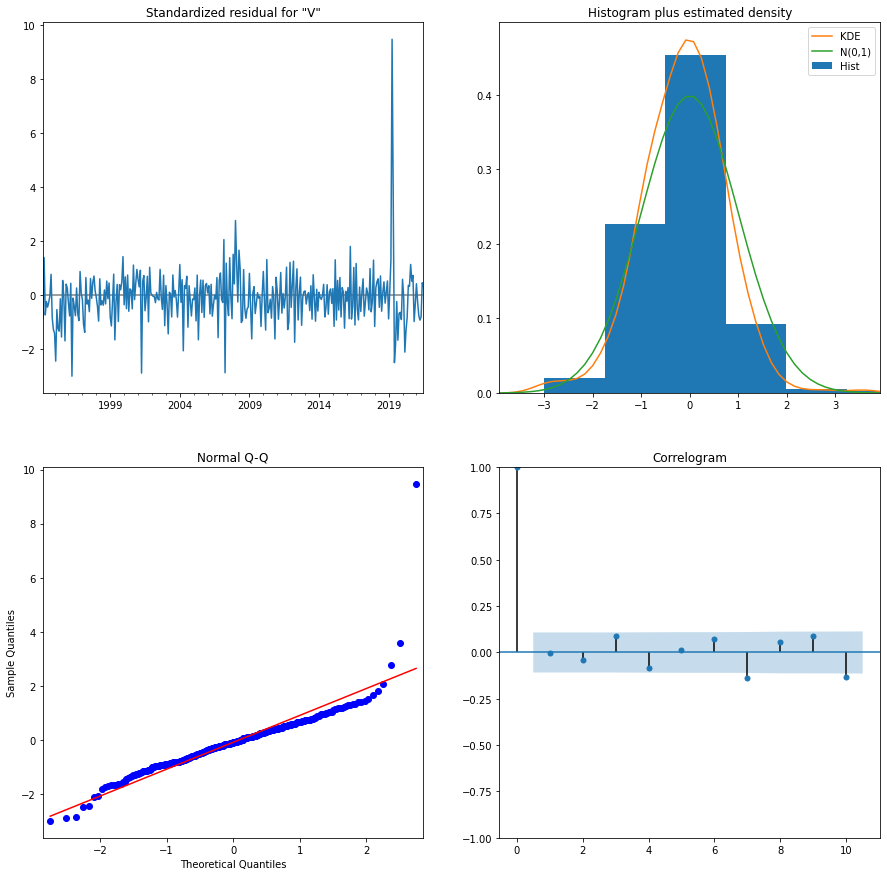

In [117]:
sarima_model.plot_diagnostics(figsize=(15,15))

#**4-Realiza una predicción de la variable utilizando el modelo calibrado.**


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


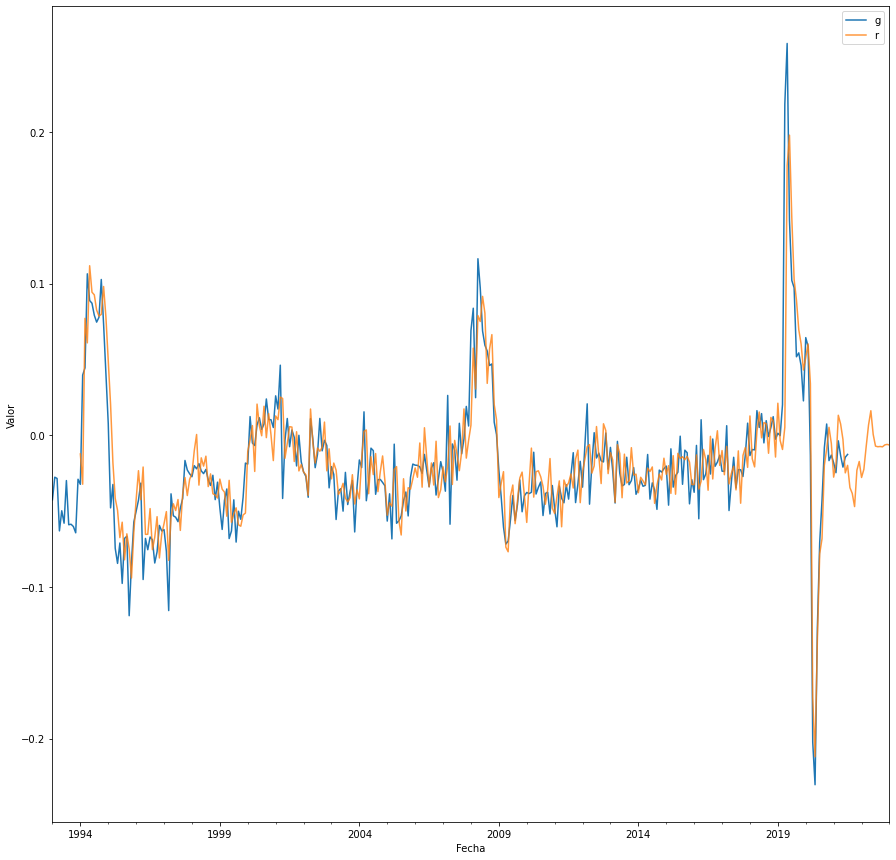

In [118]:
#establecemos parametros y usamos el metodo get_predict, para obtener nuestros resultados.
predict = sarima_model.get_prediction(start=pd.to_datetime('1994-01-01'), end=pd.to_datetime('2023-01-01'), dynamic=False)

predict_t = predict.conf_int() # se transforma el resulrado obtenido para poder graficar

#creamos la base de la grafica
ax = df_transfomed_model.plot(label="real")

#realizamos el ploteo
predict.predicted_mean.plot(ax=ax, label="Predicción", alpha=0.8, figsize=(15,15))

#ponemos etiquetas a las labels
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

plt.legend('graficas prediccion y valores reales')
plt.show()

In [119]:

#de nuevo llamamos a nuestro dataframe original y lo ordenamos de forma ascendente.
predict_data = data

predict_data = predict_data.sort_index(axis=0,ascending=False)

predict_data # se muestra el nuevo dataset

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/01,60.407691,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.022521,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.943249,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.865984,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
350,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.612900,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [120]:
# realizamos prediccion de los datos originales
df_prediccion = pd.DataFrame(sarima_model.forecast(24))


#revertimos el logaritmo aplicado anteriormente a los datos.
df_prediccion = np.exp(df_prediccion).reset_index(drop=True)

#concatenamos y dataframes para hacer uno que contenga las predicciones.
df_prediccion['Valor'] = predict_data["Valor"].tail(30).reset_index(drop=True)
df_prediccion['Forecast'] = pd.DataFrame(df_prediccion['predicted_mean'] + df_prediccion['Valor'])


# se configura la variable periodo de acuerdo a las fechas del dataframe original YYYY-MM-DD
df_prediccion['Periodo'] = pd.date_range(start='2022-07-01', periods=24, freq='M')
df_prediccion['Periodo'] = pd.to_datetime(df_prediccion['Periodo']) 

df_prediccion # se muestra el resultado

,predicted_mean,Valor,Forecast,Periodo
0,0.966058,108.859169,109.825227,2022-07-31
1,0.962396,110.036579,110.998974,2022-08-31
2,0.954069,88.273807,89.227876,2022-09-30
3,0.977237,89.005137,89.982374,2022-10-31
4,0.982864,97.928293,98.911157,2022-11-30
5,0.972544,102.370995,103.343539,2022-12-31
6,0.977805,102.742028,103.719833,2023-01-31
7,0.992679,103.368393,104.361073,2023-02-28
8,1.006715,109.270195,110.276910,2023-03-31
9,1.016301,111.065784,112.082085,2023-04-30


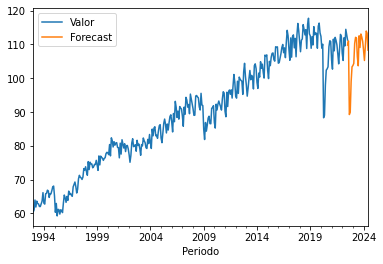

In [121]:
# se realiza la transformacion de la variable periodo a nuestro df de predict_data.

handler = predict_data['Periodo']
predict_data['Periodo'] = pd.to_datetime(handler, infer_datetime_format=True)

# se concatena el valor predecido y el original en una grafica.
ax = predict_data.plot('Periodo','Valor')
df_prediccion.plot('Periodo','Forecast', ax=ax)